## Distribuição Binomial 
Na distribuição binomial temos sempre duas possibilidades de resultado (sucesso ou fracasso, cara ou coroa, etc.). Podemos então utilizar a distribuição binomial para simular o lançamento de uma moeda.

In [6]:
import numpy as np
np.random.binomial(1, 0.5)

1

Como simular o lançamento de duas moedas?

In [12]:
np.random.binomial(2, 0.5)

1

E se eu quiser simular 1.000 lançamentos de duas moedas?

In [15]:
np.random.binomial(2, 0.5, 1000)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,

Vamos agora guardar o resultado obtido numa variável e analisar esse resultado. Vimos, na parte teórica que se lançarmos duas moedas temos as seguintes probabilidades: \
0 caras -> P(0) = 0,25 \
1 cara  -> P(1) = 0,5 \
2 caras -> P(2) = 0,25 \
Vamos plotar o resultado de 1.000 lançamentos e analisar esse resultado.

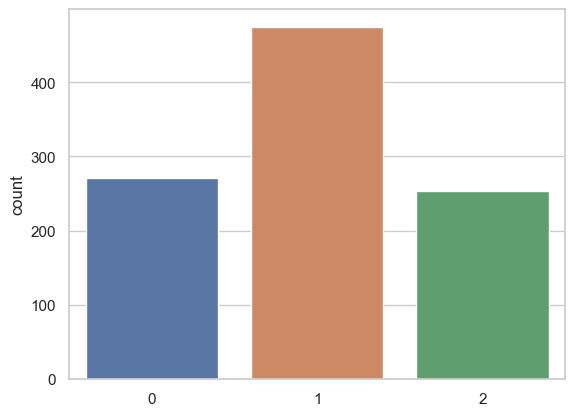

In [16]:
mil = np.random.binomial(2, 0.5,1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=mil)
plt.show()

Vamos agora simular mil jogos de 10 moedas.

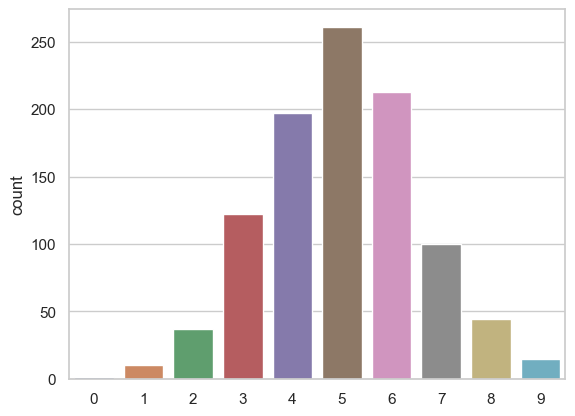

In [17]:
mil2 = np.random.binomial(10, 0.5, 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=mil2)
plt.show()

Considere agora o seguinte problema: \
Uma manufatura tem uma taxa de defeitos de 12% na sua produção. Um comprador decide testar uma amostra de 20 peças aleatórias e só comprará da manufatura se encontrar duas ou menos peças defeituosas na amostra. Qual é a probabilidade de que a compra ocorra?

Na parte teórica, vimos que existem fórmulas matemáticas para realizar este cálculo. A linguagem Python provê o pacote SciPy para realizar esses cálculos. Veremos a seguir como usar o Scipy para resolver o problema acima.

In [19]:
from scipy.stats import binom
import numpy as np

Para obter a probabilidade de que a compra ocorra, vamos utilizar a função cdf -- cumulative distribution function. Estamos usando essa função porque queremos calcular a probabilidade de termos até 2 peças defeituosas, ou seja, P(0) + P(1) + P(2) => portanto estamos acumulando (somando) as probabilidades. \
A função cdf tem 3 parâmetros: \
k - número máximo de peças defeituosas (cumulativo) \
n - número de peças da amostra \
p - probabilidade de peças defeituosas 

In [20]:
binom.cdf(2, 20, 0.12)

0.5631315224061946

E se quisermos descobrir a probabilidade de obtermos *exatamente* 2 peças defeituosas na amostra? \
Para tanto basta usar a função pmf -- probability mass function -- a qual tem os mesmos parâmetros que a função cdf.

In [21]:
binom.pmf(2, 20, 0.12)

0.27403383702748796

Para calcularmos o número médio de peças defeituosas por amostra, basta usar a função mean, com os parâmetros n e p.

In [22]:
binom.mean(20, 0.12)

2.4

De forma similar, podemos obter o desvio padrão e a variância com as funções std e var.

In [23]:
binom.std(20, 0.12)

1.453272169966796

In [24]:
binom.var(20, 0.12)

2.112

Suponha agora que queremos obter a probabilidade de obtermos 2 ou mais peças defeituosas na amostra. \
Existem duas possibilidades para isso: 
1) fazer 1 menos a probabilidade que calculamos 
2) utilizar a função sf -- survival function

In [25]:
1 - binom.cdf(2, 20, 0.12)

0.4368684775938054

In [26]:
binom.sf(2, 20, 0.12)

0.4368684775938054

Suponha agora que eu queira plotar um gráfico que mostre a probabilidade de ter 1, 2, 3, ... 20 peças defeituosas. Isto recebe o nome de distribuição de probabilidade. Vejamos como fazer isso.

In [29]:
eixo_x = np.arange(0, 21)
eixo_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [31]:
eixo_y = binom.pmf(eixo_x, 20, 0.12)
eixo_y

array([7.75627936e-02, 2.11534892e-01, 2.74033837e-01, 2.24209503e-01,
       1.29939598e-01, 5.67009156e-02, 1.93298576e-02, 5.27177935e-03,
       1.16817838e-03, 2.12396069e-04, 3.18594103e-05, 3.94951367e-06,
       4.03927535e-07, 3.38960169e-08, 2.31109206e-09, 1.26059567e-10,
       5.37185655e-12, 1.72359034e-13, 3.91725077e-15, 5.62284799e-17,
       3.83375999e-19])

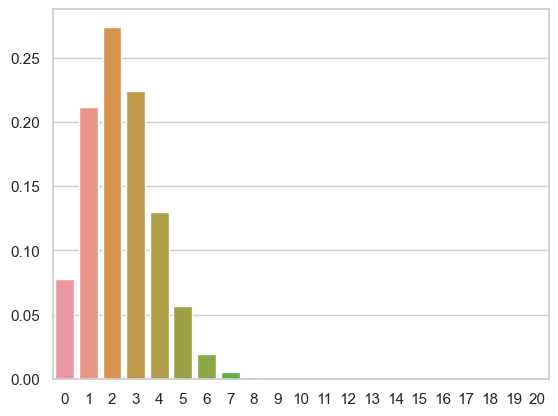

In [33]:
sns.barplot(x=eixo_x, y=eixo_y)
plt.show()

Podemos também fazer um gráfico mostrando a probabilidade cumulativa.

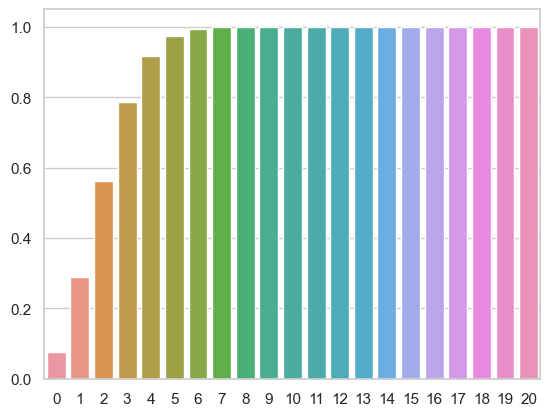

In [34]:
eixo_y = binom.cdf(eixo_x, 20, 0.12)
sns.barplot(x=eixo_x, y=eixo_y)
plt.show()

Vamos agora realizar um experimento para confirmar as probabilidades calculadas. Inicialmente vamos analisar o resultado de 10 amostras e checar o número de peças defeituosas em cada amostra.

In [37]:
vet = np.random.binomial(20, 0.12, 10)
vet

array([2, 2, 2, 2, 4, 0, 2, 2, 3, 2])

Agora vamos gerar um vetor com o resultado de 1.000 amostras e utilizar esse vetor para plotar um gráfico.

<Axes: ylabel='count'>

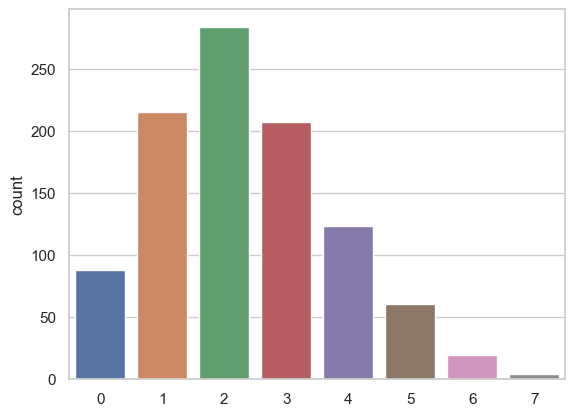

In [20]:
vet = np.random.binomial(20, 0.12, 1000)
sns.countplot(x=vet)

Exercício 1 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 caras?

In [38]:
binom.pmf(7, 10, 0.5)

0.11718749999999999

Exercício 2 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 ou mais caras?

In [41]:
binom.sf(6, 10, 0.5)

0.171875

Exercício 3 \
4 peças foram selecionadas de um lote cuja probabilidade de defeito é de 10%. Qual é a probabilidade de termos 0 peças defeituosas na seleção?

In [23]:
binom.pmf(0, 4, 0.1)

0.6561

Exercício 4
Plote um gráfico que exiba a distribuição de probabilidade do problema descrito no exercício 3.

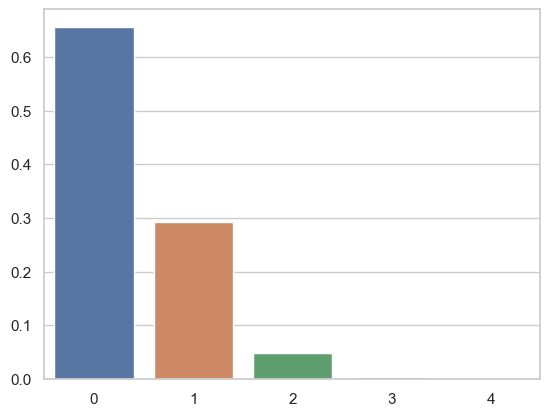

In [24]:
eixo_x = np.arange(0, 5)
eixo_y = binom.pmf(eixo_x, 4, 0.1)
sns.barplot(x=eixo_x, y=eixo_y)
plt.show()